In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load image (change path to your image)
img = Image.open("image.jpg").convert("L")  # L = grayscale

transform = transforms.Compose([
    transforms.Resize((32, 128)),   # OCR standard
    transforms.ToTensor()           # (1, 32, 128), values 0–1
])

img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)  # add batch → (1, 1, 32, 128)

print("Input shape:", img_tensor.shape)


Input shape: torch.Size([1, 1, 32, 128])


In [2]:
conv = nn.Conv2d(
    in_channels=1,
    out_channels=8,   # 8 filters (easy to visualize)
    kernel_size=3,
    stride=1,
    padding=1
)


In [3]:
output = conv(img_tensor)
print("Output shape:", output.shape)


Output shape: torch.Size([1, 8, 32, 128])


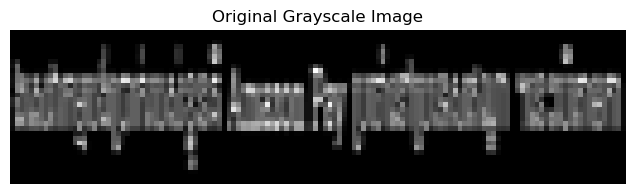

In [4]:
plt.figure(figsize=(8, 2))
plt.title("Original Grayscale Image")
plt.imshow(img_tensor[0, 0], cmap="gray")
plt.axis("off")
plt.show()


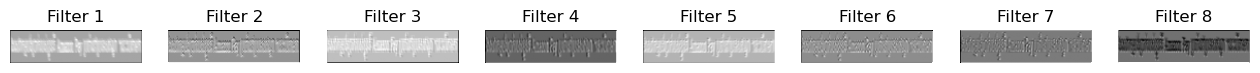

In [5]:
fig, axes = plt.subplots(1, 8, figsize=(16, 3))

for i in range(8):
    axes[i].imshow(output[0, i].detach(), cmap="gray")
    axes[i].set_title(f"Filter {i+1}")
    axes[i].axis("off")

plt.show()
